In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('patient_heart_rate.csv',header=0,delimiter=',',encoding='utf-8')
df

,Id,Name,Age,Weight,m0006,m0612,m1218,f0006,f0612,f1218
0,1.0,Mickéy Mousé,56.0,70kgs,72,69,71,-,-,-
1,2.0,Donald Duck,34.0,154.89lbs,-,-,-,85,84,76
2,3.0,Mini Mouse,16.0,NaN,-,-,-,65,69,72
3,4.0,Scrooge McDuck,NaN,78kgs,78,79,72,-,-,-
4,5.0,Pink Panther,54.0,198.658lbs,-,-,-,69,NaN,75
5,6.0,Huey McDuck,52.0,189lbs,-,-,-,68,75,72
6,7.0,Dewey McDuck,19.0,56kgs,-,-,-,71,78,75
7,8.0,Scööpy Doo,32.0,78kgs,78,76,75,-,-,-
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
column_name = ['Id', 'Name', 'Age', 'Weight', 'm0006', 'm0612', 'm1218', 'f0006', 'f0612', 'f1218']

In [5]:
df = pd.read_csv('patient_heart_rate.csv',header=0,delimiter=',',encoding='utf-8', names=column_name)
df.head(10)

,Id,Name,Age,Weight,m0006,m0612,m1218,f0006,f0612,f1218
0,1.0,Mickéy Mousé,56.0,70kgs,72,69,71,-,-,-
1,2.0,Donald Duck,34.0,154.89lbs,-,-,-,85,84,76
2,3.0,Mini Mouse,16.0,NaN,-,-,-,65,69,72
3,4.0,Scrooge McDuck,NaN,78kgs,78,79,72,-,-,-
4,5.0,Pink Panther,54.0,198.658lbs,-,-,-,69,NaN,75
5,6.0,Huey McDuck,52.0,189lbs,-,-,-,68,75,72
6,7.0,Dewey McDuck,19.0,56kgs,-,-,-,71,78,75
7,8.0,Scööpy Doo,32.0,78kgs,78,76,75,-,-,-
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df[['Firstname','Lastname']] = df['Name'].str.split(expand=True)
df = df.drop('Name', axis=1)

In [7]:
weight = df['Weight']

for i in range(0, len(weight)):
    x = str(weight[i])
    if 'lbs' in x[-3:]:
        x = x[:-3]
        float_x = float(x)
        y = int(float_x / 2.2)
        #y = str(y)
        weight[i] = y
    if 'kgs' in x[-3:]:
        x = x[:-3]
        float_x = float(x)
        weight[i] = x

<ipython-input-7-48db2597a352>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weight[i] = x
<ipython-input-7-48db2597a352>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weight[i] = y


In [8]:
df.rename(columns={'Weight':'Weight_kgs'}, inplace=True)

In [9]:
df.dropna(how='all', inplace=True)

In [10]:
df = df.drop_duplicates (subset=['Firstname', 'Lastname', 'Age', 'Weight_kgs'])

In [11]:
df.Firstname.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)
df.Lastname.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)
print(df)

      Id   Age Weight_kgs m0006 m0612 m1218 f0006 f0612 f1218 Firstname  \
0    1.0  56.0         70    72    69    71     -     -     -     Micky   
1    2.0  34.0         70     -     -     -    85    84    76    Donald   
2    3.0  16.0        NaN     -     -     -    65    69    72      Mini   
3    4.0   NaN         78    78    79    72     -     -     -   Scrooge   
4    5.0  54.0         90     -     -     -    69   NaN    75      Pink   
5    6.0  52.0         85     -     -     -    68    75    72      Huey   
6    7.0  19.0         56     -     -     -    71    78    75     Dewey   
7    8.0  32.0         78    78    76    75     -     -     -      Scpy   
11  10.0  12.0         45     -     -     -    92    95    87     Louie   
12  11.0   NaN         60    78    75    72     -     -     -     Henry   
13  12.0  34.0        NaN    65    67    55     -     -     -    Michel   
14  13.0   NaN        NaN     -     -     -    68    72    70      Tana   
15  14.0   NaN        NaN

In [12]:
df['Age'].fillna(df['Age'].mode()[0], inplace=True)

In [13]:
df['Weight_kgs'].fillna(df['Weight_kgs'].median(), inplace=True)

In [14]:
df.head(10)

,Id,Age,Weight_kgs,m0006,m0612,m1218,f0006,f0612,f1218,Firstname,Lastname
0,1.0,56.0,70,72,69,71,-,-,-,Micky,Mous
1,2.0,34.0,70,-,-,-,85,84,76,Donald,Duck
2,3.0,16.0,74,-,-,-,65,69,72,Mini,Mouse
3,4.0,34.0,78,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,54.0,90,-,-,-,69,NaN,75,Pink,Panther
5,6.0,52.0,85,-,-,-,68,75,72,Huey,McDuck
6,7.0,19.0,56,-,-,-,71,78,75,Dewey,McDuck
7,8.0,32.0,78,78,76,75,-,-,-,Scpy,Doo
11,10.0,12.0,45,-,-,-,92,95,87,Louie,McDuck
12,11.0,34.0,60,78,75,72,-,-,-,Henry,Nam


In [15]:
df = pd.melt (df, id_vars=['Id', 'Age', 'Weight_kgs', 'Firstname', 'Lastname'], value_name='PulseRate', var_name='gender_time').sort_values(['Id', 'Age', 'Weight_kgs', 'Firstname', 'Lastname'])
df.head(5)

,Id,Age,Weight_kgs,Firstname,Lastname,gender_time,PulseRate
0,1.0,56.0,70,Micky,Mous,m0006,72
14,1.0,56.0,70,Micky,Mous,m0612,69
28,1.0,56.0,70,Micky,Mous,m1218,71
42,1.0,56.0,70,Micky,Mous,f0006,-
56,1.0,56.0,70,Micky,Mous,f0612,-


In [16]:
df_temp = df['gender_time'].str.extract("(\D)(\d+)(\d{2})", expand=True)
df.head(5)

,Id,Age,Weight_kgs,Firstname,Lastname,gender_time,PulseRate
0,1.0,56.0,70,Micky,Mous,m0006,72
14,1.0,56.0,70,Micky,Mous,m0612,69
28,1.0,56.0,70,Micky,Mous,m1218,71
42,1.0,56.0,70,Micky,Mous,f0006,-
56,1.0,56.0,70,Micky,Mous,f0612,-


In [17]:
df_temp.columns = ['Gender', 'Lower_hour', 'Upper_hour']
df.head(5)

,Id,Age,Weight_kgs,Firstname,Lastname,gender_time,PulseRate
0,1.0,56.0,70,Micky,Mous,m0006,72
14,1.0,56.0,70,Micky,Mous,m0612,69
28,1.0,56.0,70,Micky,Mous,m1218,71
42,1.0,56.0,70,Micky,Mous,f0006,-
56,1.0,56.0,70,Micky,Mous,f0612,-


In [18]:
df = pd.concat([df,df_temp], axis=1)
df.head(5)

,Id,Age,Weight_kgs,Firstname,Lastname,gender_time,PulseRate,Gender,Lower_hour,Upper_hour
0,1.0,56.0,70,Micky,Mous,m0006,72,m,00,06
14,1.0,56.0,70,Micky,Mous,m0612,69,m,06,12
28,1.0,56.0,70,Micky,Mous,m1218,71,m,12,18
42,1.0,56.0,70,Micky,Mous,f0006,-,f,00,06
56,1.0,56.0,70,Micky,Mous,f0612,-,f,06,12


In [19]:
df = df.drop(['gender_time'],axis=1)
df.head(5)

,Id,Age,Weight_kgs,Firstname,Lastname,PulseRate,Gender,Lower_hour,Upper_hour
0,1.0,56.0,70,Micky,Mous,72,m,00,06
14,1.0,56.0,70,Micky,Mous,69,m,06,12
28,1.0,56.0,70,Micky,Mous,71,m,12,18
42,1.0,56.0,70,Micky,Mous,-,f,00,06
56,1.0,56.0,70,Micky,Mous,-,f,06,12


In [20]:
df = df.replace('-',np.nan).dropna (subset=['PulseRate'])
df.head(10)

,Id,Age,Weight_kgs,Firstname,Lastname,PulseRate,Gender,Lower_hour,Upper_hour
0,1.0,56.0,70,Micky,Mous,72,m,00,06
14,1.0,56.0,70,Micky,Mous,69,m,06,12
28,1.0,56.0,70,Micky,Mous,71,m,12,18
43,2.0,34.0,70,Donald,Duck,85,f,00,06
57,2.0,34.0,70,Donald,Duck,84,f,06,12
71,2.0,34.0,70,Donald,Duck,76,f,12,18
44,3.0,16.0,74,Mini,Mouse,65,f,00,06
58,3.0,16.0,74,Mini,Mouse,69,f,06,12
72,3.0,16.0,74,Mini,Mouse,72,f,12,18
3,4.0,34.0,78,Scrooge,McDuck,78,m,00,06


In [21]:
df['Firstname'].isnull().sum()

3

In [22]:
df['Lastname'].isnull().sum()

3

In [23]:
df['Firstname'].fillna('Unknown', inplace=True)

In [24]:
df['Lastname'].fillna('Unknown', inplace=True)

In [25]:
df = df.reset_index()
df.head(5)

,index,Id,Age,Weight_kgs,Firstname,Lastname,PulseRate,Gender,Lower_hour,Upper_hour
0,0,1.0,56.0,70,Micky,Mous,72,m,00,06
1,14,1.0,56.0,70,Micky,Mous,69,m,06,12
2,28,1.0,56.0,70,Micky,Mous,71,m,12,18
3,43,2.0,34.0,70,Donald,Duck,85,f,00,06
4,57,2.0,34.0,70,Donald,Duck,84,f,06,12


In [30]:
df.to_csv('patient_heart_rate_clean.csv')

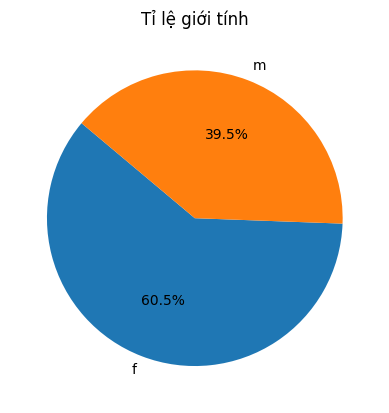

In [251]:
#1. Vẽ biểu đồ Pie thể hiện tỉ lệ bệnh nhân nam và nữ
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Tỉ lệ giới tính')
plt.show()

           Fullname
0        Micky Mous
1        Micky Mous
2        Micky Mous
3       Donald Duck
4       Donald Duck
5       Donald Duck
6        Mini Mouse
7        Mini Mouse
8        Mini Mouse
9    Scrooge McDuck
10   Scrooge McDuck
11   Scrooge McDuck
12     Pink Panther
13     Pink Panther
14      Huey McDuck
15      Huey McDuck
16      Huey McDuck
17     Dewey McDuck
18     Dewey McDuck
19     Dewey McDuck
20         Scpy Doo
21         Scpy Doo
22         Scpy Doo
23     Louie McDuck
24     Louie McDuck
25     Louie McDuck
26        Henry Nam
27        Henry Nam
28        Henry Nam
29      Michel Long
30      Michel Long
31      Michel Long
32       Tana Ricky
33       Tana Ricky
34       Tana Ricky
35  Unknown Unknown
36  Unknown Unknown
37  Unknown Unknown


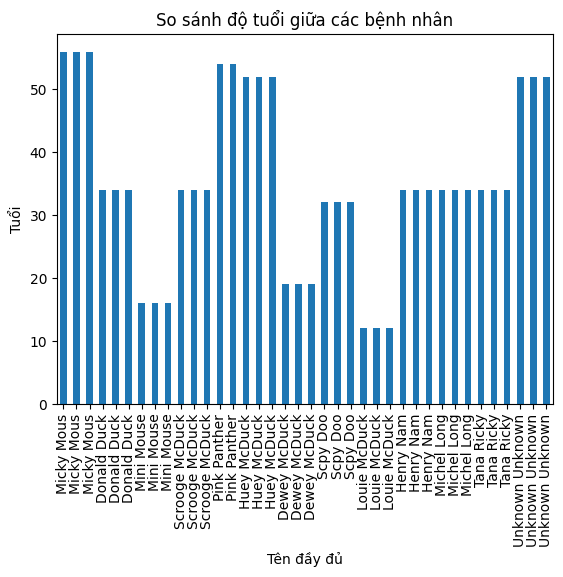

In [252]:
#2. Hãy tạo cột Fullname = Firstname+’ ‘+Lastname
df['Fullname'] = df['Firstname'] + ' ' + df['Lastname']
print(df[['Fullname']])

#3. Vẽ biểu đồ cột so sánh độ tuổi giữa các tên bệnh nhân
df.plot(kind='bar', x='Fullname', y='Age', legend=False)
plt.title('So sánh độ tuổi giữa các bệnh nhân')
plt.xlabel('Tên đầy đủ')
plt.ylabel('Tuổi')
plt.show()

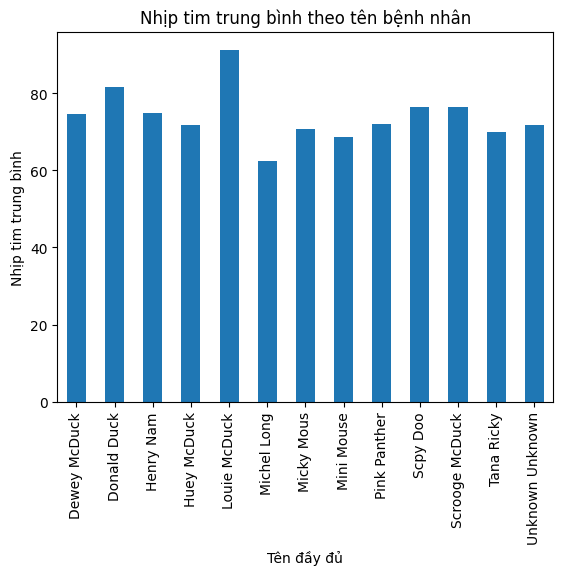

In [255]:

df['PulseRate'] = pd.to_numeric(df['PulseRate'], errors='coerce')

#4. Vẽ biểu đồ cột so sánh nhịp tim trung bình giữa các tên bệnh nhân
df.groupby('Fullname')['PulseRate'].mean().plot(kind='bar')
plt.title('Nhịp tim trung bình theo tên bệnh nhân')
plt.xlabel('Tên đầy đủ')
plt.ylabel('Nhịp tim trung bình')
plt.show()


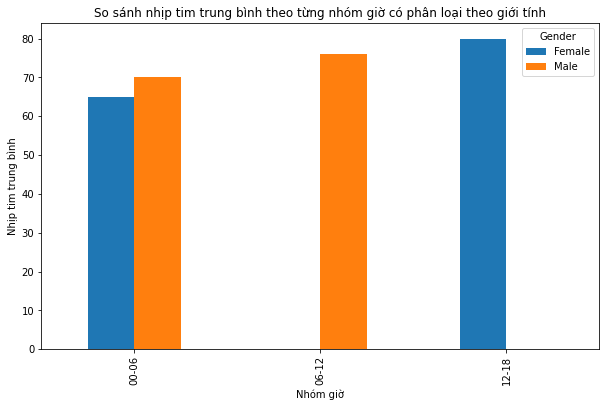

In [28]:
#5 Vẽ biểu đồ cột so sánh nhịp tim trung bình theo từng nhóm giờ 00-06, 06-12,12-18 có phân loại theo giới tính
data = pd.DataFrame({
    'Time_Group': ['00-06', '06-12', '12-18', '00-06', '06-12'],
    'Gender': ['Male', 'Male', 'Female', 'Female', 'Male'],
    'Average_Heart_Rate': [70, 75, 80, 65, 77]
})

pivot_data = data.pivot_table(index='Time_Group', columns='Gender', values='Average_Heart_Rate', aggfunc='mean')

pivot_data.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Nhóm giờ')
plt.ylabel('Nhịp tim trung bình')
plt.title('So sánh nhịp tim trung bình theo từng nhóm giờ có phân loại theo giới tính')
plt.show()


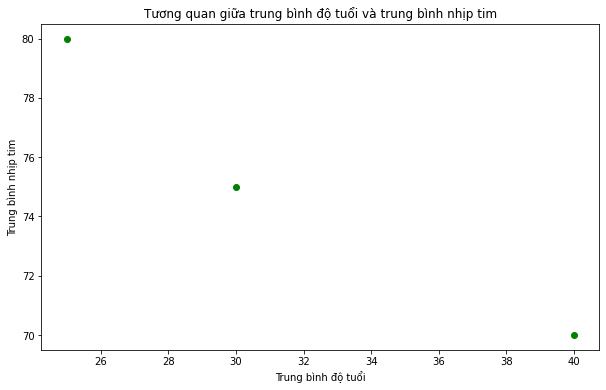

In [31]:
#6 Vẽ biểu đồ phân tán thể hiện tương quan giữa trung bình độ tuổi và trung bình nhịp tim
data = pd.DataFrame({
    'Average_Age': [30, 25, 40],
    'Average_Heart_Rate': [75, 80, 70]
})

plt.figure(figsize=(10, 6))
plt.scatter(data['Average_Age'], data['Average_Heart_Rate'], color='green')
plt.xlabel('Trung bình độ tuổi')
plt.ylabel('Trung bình nhịp tim')
plt.title('Tương quan giữa trung bình độ tuổi và trung bình nhịp tim')
plt.show()


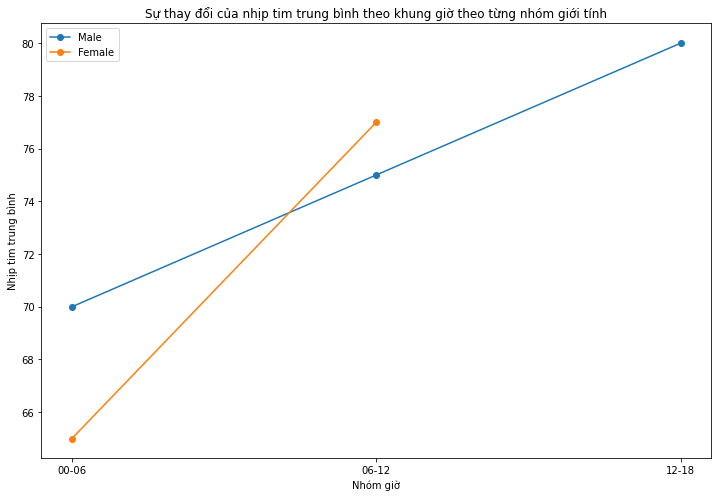

In [32]:
#7 Vẽ biểu đồ đường thể hiện sự thay đổi của nhịp tim trung bình các bệnh nhân theo thứ tự khung giờ 00-06, 06-12,12-18 theo từng nhóm giới tính. 
data = pd.DataFrame({
    'Time_Group': ['00-06', '06-12', '12-18', '00-06', '06-12'],
    'Gender': ['Male', 'Male', 'Male', 'Female', 'Female'],
    'Average_Heart_Rate': [70, 75, 80, 65, 77]
})

plt.figure(figsize=(12, 8))
for gender in data['Gender'].unique():
    gender_data = data[data['Gender'] == gender]
    plt.plot(gender_data['Time_Group'], gender_data['Average_Heart_Rate'], marker='o', label=gender)

plt.xlabel('Nhóm giờ')
plt.ylabel('Nhịp tim trung bình')
plt.title('Sự thay đổi của nhịp tim trung bình theo khung giờ theo từng nhóm giới tính')
plt.legend()
plt.show()
